Preliminary exploratory data analysis:

    - Demonstrate that the dataset can be read from the web into R 
    - Clean and wrangle your data into a tidy format
    - Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
    - Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compa
    res the distributions of each of the predictor variables you plan to use in your analysis.

In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [8]:
wine_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", col_names = FALSE) |>
    mutate(X1 = as_factor(X1))
colnames(wine_data) <- c("class","alcohol", "malic.acid", "ash", "alcalinity.of.ash","magnesium", "total,phenols",
                         "flavanoids", "nonfalvanoid.phenols", "proanthocyanins", "color.intensity", "hue",
                         "OD280/OD315.of.diluted wines", "proline")
wine_data

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,"total,phenols",flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280/OD315.of.diluted wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [12]:
wine_split <- initial_split(wine_data, prop = 0.75, strata = class)  
wine_training <- training(wine_split)   
wine_testing <- testing(wine_split)
wine_training
wine_testing

class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,"total,phenols",flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280/OD315.of.diluted wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,"total,phenols",flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280/OD315.of.diluted wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.69,3.26,2.54,20,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
3,13.78,2.76,2.30,22,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
3,13.27,4.28,2.26,20,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [19]:
wine_mean <- wine_training |>
    summarise(across(alcohol:proline, mean)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'mean') 
wine_min <- wine_training |>
    summarise(across(alcohol:proline, min)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'min') 
wine_max <- wine_training |>
    summarise(across(alcohol:proline, max)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'max') 
wine_sd <- wine_training |>
    summarise(across(alcohol:proline, sd)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'sd') 

wine_stats <- wine_min |>
    bind_cols(wine_max |> select(max)) |>
    bind_cols(wine_mean |> select(mean)) |>
    bind_cols(wine_sd |> select(sd))

wine_stats

wine_proportions <- wine_training |>
    group_by(class) |>
    summarize(n = n())
wine_proportions

attribute,min,max,mean,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alcohol,11.03,14.75,12.987744,0.7955593
malic.acid,0.89,5.80,2.328872,1.1129300
ash,1.36,3.23,2.380677,0.2694247
⋮,⋮,⋮,⋮,⋮
hue,0.55,1.71,0.9566917,0.2279079
OD280/OD315.of.diluted wines,1.27,4.00,2.6052632,0.7037600
proline,278.00,1547.00,736.6015038,314.5154267


class,n
<fct>,<int>
1,44
2,53
3,36


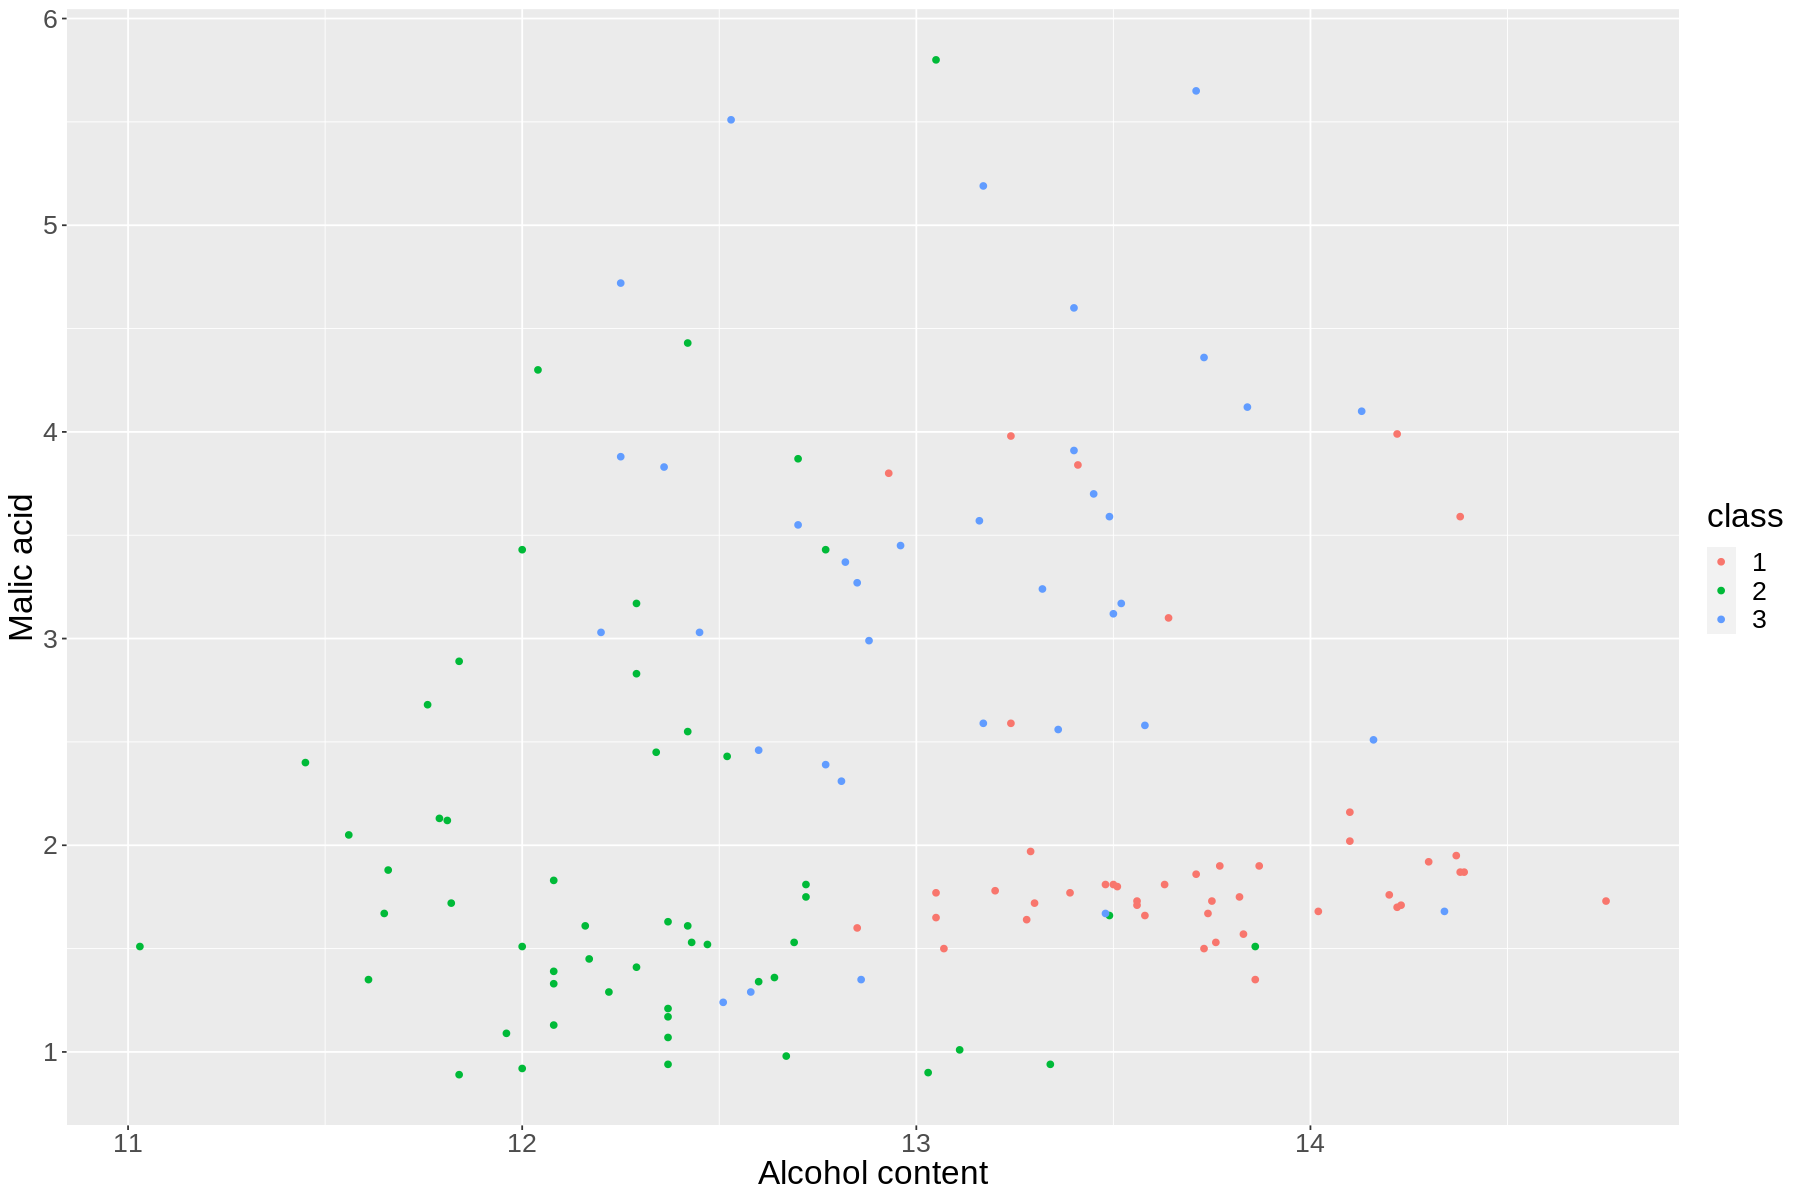

In [20]:

options(repr.plot.width = 15, repr.plot.height = 10)
wine_plot <- wine_training |>
    ggplot(aes(x = alcohol, y = malic.acid, colour = class)) +
    geom_point() +
labs(x = "Alcohol content", y = "Malic acid") +
    theme(text = element_text(size = 20))
wine_plot